In [1]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

2.9.1
2.9.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist


In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape)
print(X_train.dtype)
print(y_train.shape)
print(y_train.dtype)

(60000, 28, 28)
uint8
(60000,)
uint8


In [4]:
def dividedBy255(array):
    return array / 255.0

def splitTrainSimply(train_data, valid_rate=0.25):
    data_len = train_data.shape[0]
    border = int(data_len * valid_rate)
    return train_data[border:], train_data[:border]

X_train, X_valid = splitTrainSimply(dividedBy255(X_train))
y_train, y_valid = splitTrainSimply(y_train)
X_test = dividedBy255(X_test)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(45000, 28, 28)
(15000, 28, 28)
(45000,)
(15000,)


In [5]:

from keras import layers
simple_model = keras.Sequential(
    [
        layers.InputLayer(input_shape=[28, 28]),
        layers.Flatten(),
        layers.Dense(300, activation=keras.activations.relu),
        layers.Dense(100, activation=keras.activations.relu),
        layers.Dense(10, activation=keras.activations.softmax)
    ]
)
simple_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


2022-08-18 18:39:54.474489: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
simple_model.layers

In [7]:
from keras import optimizers
from keras import losses
from keras import metrics
simple_model.compile(
    optimizer=optimizers.SGD(),
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=[metrics.SparseCategoricalAccuracy()]
)

In [8]:
history = simple_model.fit(
    X_train, y_train, epochs=30, validation_data=(X_valid, y_valid)
)

Epoch 1/30


2022-08-18 18:39:54.929750: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 141120000 exceeds 10% of free system memory.


1407/1407 [==============================] - 6s 4ms/step - loss: 0.7617 - sparse_categorical_accuracy: 0.7530 - val_loss: 0.5268 - val_sparse_categorical_accuracy: 0.8204
Epoch 2/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.5080 - sparse_categorical_accuracy: 0.8242 - val_loss: 0.4980 - val_sparse_categorical_accuracy: 0.8242
Epoch 3/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4604 - sparse_categorical_accuracy: 0.8398 - val_loss: 0.4507 - val_sparse_categorical_accuracy: 0.8422
Epoch 4/30
1407/1407 [==============================] - 6s 5ms/step - loss: 0.4321 - sparse_categorical_accuracy: 0.8489 - val_loss: 0.5080 - val_sparse_categorical_accuracy: 0.8211
Epoch 5/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4115 - sparse_categorical_accuracy: 0.8556 - val_loss: 0.4035 - val_sparse_categorical_accuracy: 0.8590
Epoch 6/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3945 - sparse_categoric

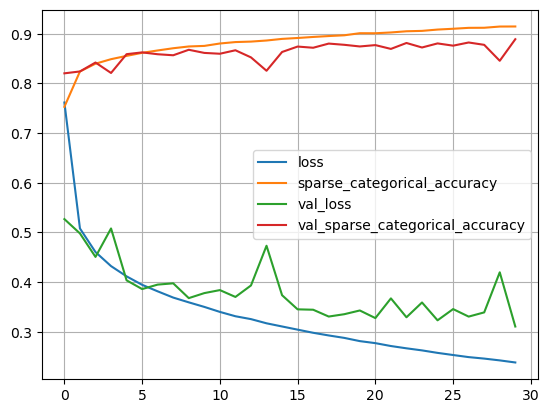

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.grid(True)

In [10]:
simple_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3407 - sparse_categorical_accuracy: 0.8799


[0.34067803621292114, 0.8798999786376953]

In [11]:
p_test = simple_model.predict(X_test[:1])
p_test.round(2)

1/1 [==============================] - 0s 92ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.97]],
      dtype=float32)